# Montu Python 
## Astronomical ephemerides for the Ancient World
## Test: stars

In [1]:
import montu
from montu import D2H,PRINTDF,TABLEDF
%load_ext autoreload
%autoreload 2

### Testing stars

In [2]:
allstars = montu.Stars()

In [3]:
allstars

Stars(number=119626)

In [4]:
allstars.data.columns

Index(['MN', 'HD', 'HR', 'HIP', 'Gl', 'Name', 'OtherDesignations',
       'ProperName', 'Bayer', 'Flamsteed', 'Constellation', 'RAJ2000',
       'DecJ2000', 'pmRA', 'pmDec', 'RadVel', 'Distance', 'Vmag', 'Vmag_min',
       'Vmag_max', 'B-V', 'SpType', 'Luminosity', 'XJ2000', 'YJ2000', 'ZJ2000',
       'VXJ2000', 'VYJ2000', 'VZJ2000', 'Primary', 'MultipleID', 'IsMultiple',
       'IsVariable'],
      dtype='object')

Altough you may manipulate this DataFrame using the conventional commands in pandas, we have designed several useful methods to obtain subsets of the catalogue. For instance if you want to extract the stars visible to naked eye, the command would be:

In [5]:
stars = allstars.get_stars(Vmag=[-2,6.5])
print(f"There is {stars.number} visible to the naked eye in the catalogue")

There is 8920 visible to the naked eye in the catalogue


You can use any of the properties of the stars to filter them. A common filter is to look for single stars:

In [17]:
aldebaran = stars.get_stars(ProperName='Aldebaran')
print(aldebaran)

1 star:
|    |   MN |    HD |   HR |   HIP | Gl        | Name      | OtherDesignations                                                                     | ProperName   | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |   VXJ2000 |   VYJ2000 |   VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|----|------|-------|------|-------|-----------|-----------|---------------------------------------------------------------------------------------|--------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|-----------|-----------|-----------|-----------|--------------|--------------|--------------|
| 14 |   15 | 29139 | 1457 | 21421 | Gl 171.1A | Aldeb

Another useful method included with the class `Stars` is that of filtering the getting the stars close to a given point in the sky. For illustrare, below is the command to obtain all stars in the sky with magnitudes less than 5 and that are at 5.5 degrees or less than Aldebaran:

In [19]:
hyades = stars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=5.5,Vmag=[-1,5])
print(hyades)

18 star(s):
|      |   MN |    HD |   HR |   HIP | Gl        | Name           | OtherDesignations                                                                     | ProperName     | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |    VXJ2000 |    VYJ2000 |    VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|------|------|-------|------|-------|-----------|----------------|---------------------------------------------------------------------------------------|----------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|------------|------------|------------|-----------|--------------|--------------|--------------|
|   14 |   15 | 29139 | 14

We can map the stars:

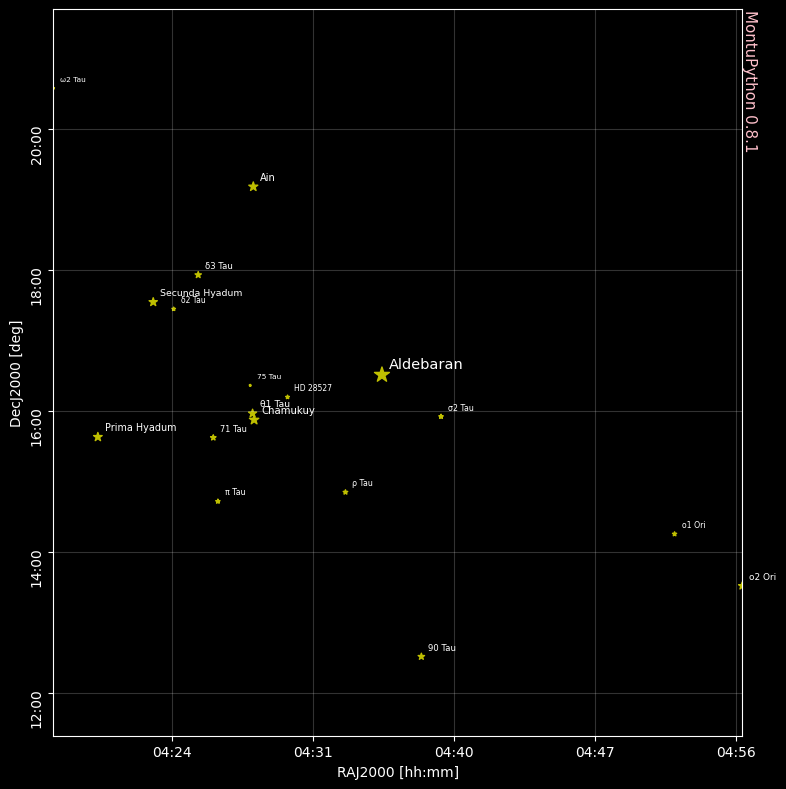

In [8]:
fig,axs = hyades.plot_stars()
fig.savefig('gallery/hyades.png')